<a href="https://colab.research.google.com/github/MatthewG45/Digit_recognizer_CNN/blob/main/Digit_recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digit Recognizer
SOFE 4620 Machine Learning and Data Mining Group Project<br>
Group 2 <br>
Matthew Gardiner - 100768198<br>
Eric Hua - 100777617

## Import Statements

In [24]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

## Functions

## load_and_preprocess_data
Loads in the MNIST dataset directly from tensorflow.<br>
Normalizes the pixel values.<br>
Returns the processed data.

In [25]:
def load_and_preprocess_data():
    # Load the MNIST dataset
    mnist = tf.keras.datasets.mnist
    (train_images, train_labels), (test_images, test_labels) = mnist.load_data()

    # Normalize the pixel values
    train_images = normalize_images(train_images)
    test_images = normalize_images(test_images)

    return (train_images, train_labels), (test_images, test_labels)

In [26]:
def normalize_images(images):
    # Normalize pixel values to range [0, 1]
    return images / 255.0

## build_model
Defines the models architecture

## Simple ANN

Here is a simple artificial neural network with only fully connected layers plus some dropout regularitzation

In [27]:
def build_modelANN():
    # Define the model architecture
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model

## Simple CNN

Here is a simpler convolutional artificial neural network where instead of two convolutional layers per pooling layer there is only one. This is ultimately to save time when training the model as the complex CNN below can take upwards of 15 minutes to train.

In [28]:
def build_modelCNNSimple():
    # Define the model architecture
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(28,28,1)),
        tf.keras.layers.Conv2D(32, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=2),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model

## Main CNN

Here is a convolutional artificial neural network with two convolution plus pooling sub-layers, followed by 3 fully connected layers to classify. Dropout regularization was also used throughout

In [29]:
def build_modelCNN():
    # Define the model architecture
    model = tf.keras.models.Sequential([

        tf.keras.layers.Input(shape=(28,28,1)),

        tf.keras.layers.Conv2D(32, 3, activation='relu', strides=1, padding='same'),
        tf.keras.layers.MaxPooling2D(pool_size=2),
        tf.keras.layers.Dropout(0.2),

        tf.keras.layers.Conv2D(32, 3, activation='relu', strides=1, padding='same'),
        tf.keras.layers.Conv2D(32, 3, activation='relu', strides=1, padding='same'),
        tf.keras.layers.MaxPooling2D(pool_size=2),
        tf.keras.layers.Dropout(0.2),

        tf.keras.layers.Conv2D(32, 3, activation='relu', strides=1, padding='same'),
        tf.keras.layers.Conv2D(32, 3, activation='relu', strides=1, padding='same'),
        tf.keras.layers.MaxPooling2D(pool_size=2),
        tf.keras.layers.Dropout(0.2),

        #fully connected layers to start prediction
        #begin by flattening the output
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model

## train_model
Compiles and trains the model using Adam optimization.

Also prints a graph showing training accuracy over epochs

In [35]:
def train_model(model, train_images, train_labels, epochs=5):
    # Compile the model
    print("Training:")
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    model_history = model.fit(train_images, train_labels, epochs=epochs)

    plt.plot(model_history.history['accuracy'])
    plt.legend(['accuracy'],loc='lower right')
    plt.title("model train accuracy")
    plt.xlabel("epoch")
    plt.ylabel("accuracy")
    plt.show()

## evaluate_model
Evaluates the models performance.

In [31]:
def evaluate_model(model, test_images, test_labels):
    # Evaluate the model
    print("Evaluation:")
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    print(f"Test accuracy: {test_acc}")

## make_predictions
Simply predicts on the first few samples and prints the result; a more human approach of displaying the results

In [32]:
def make_predictions(model, test_images, num_samples=5):
    # Make predictions
    predictions = model.predict(test_images[:num_samples])
    predicted_labels = predictions.argmax(axis=1)
    print("Predictions:")
    print(predicted_labels)

## display errors

displays 8 most important errors

Code from:

[1] rgarg1234, “Digit recognizer: CNN,” Kaggle, https://www.kaggle.com/code/rgarg1234/digit-recognizer-cnn (accessed Apr. 4, 2024).


In [33]:
def display_important_errors(predictions, predicted_labels, test_labels, test_images): #[1]
  errors = (predicted_labels - test_labels != 0)

  Y_pred_classes_errors = predicted_labels[errors]
  Y_pred_errors = predictions[errors]
  Y_true_errors = test_labels[errors]
  X_val_errors = test_images[errors]

  def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    n = 0
    nrows = 2
    ncols = 4
    fig, ax = plt.subplots(nrows,ncols,figsize=(15,15))
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1
  Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

  true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

  delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

  sorted_dela_errors = np.argsort(delta_pred_true_errors)


  most_important_errors = sorted_dela_errors

  display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

## Main Code

## ANN
This is the running module of the simple artificial neural network

Training:
Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3004 - accuracy: 0.9132
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1444 - accuracy: 0.9577
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1089 - accuracy: 0.9673
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0863 - accuracy: 0.9740
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0747 - accuracy: 0.9769


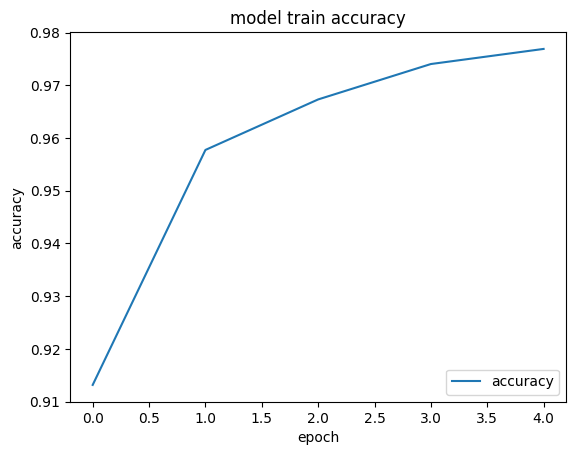

Evaluation:
313/313 [==============================] - 1s 3ms/step - loss: 0.0809 - accuracy: 0.9759
Test accuracy: 0.9758999943733215
313/313 [==============================] - 1s 2ms/step


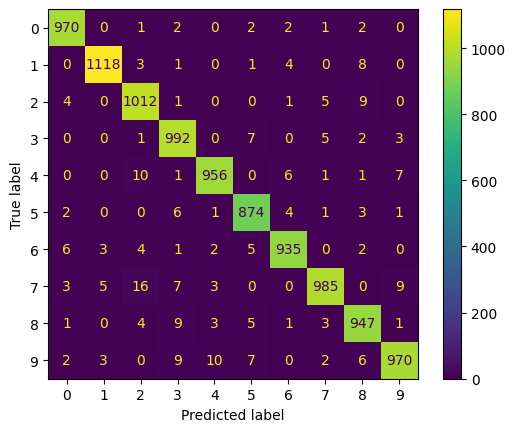

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_22 (Dense)            (None, 128)               100480    
                                                                 
 dropout_16 (Dropout)        (None, 128)               0         
                                                                 
 dense_23 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


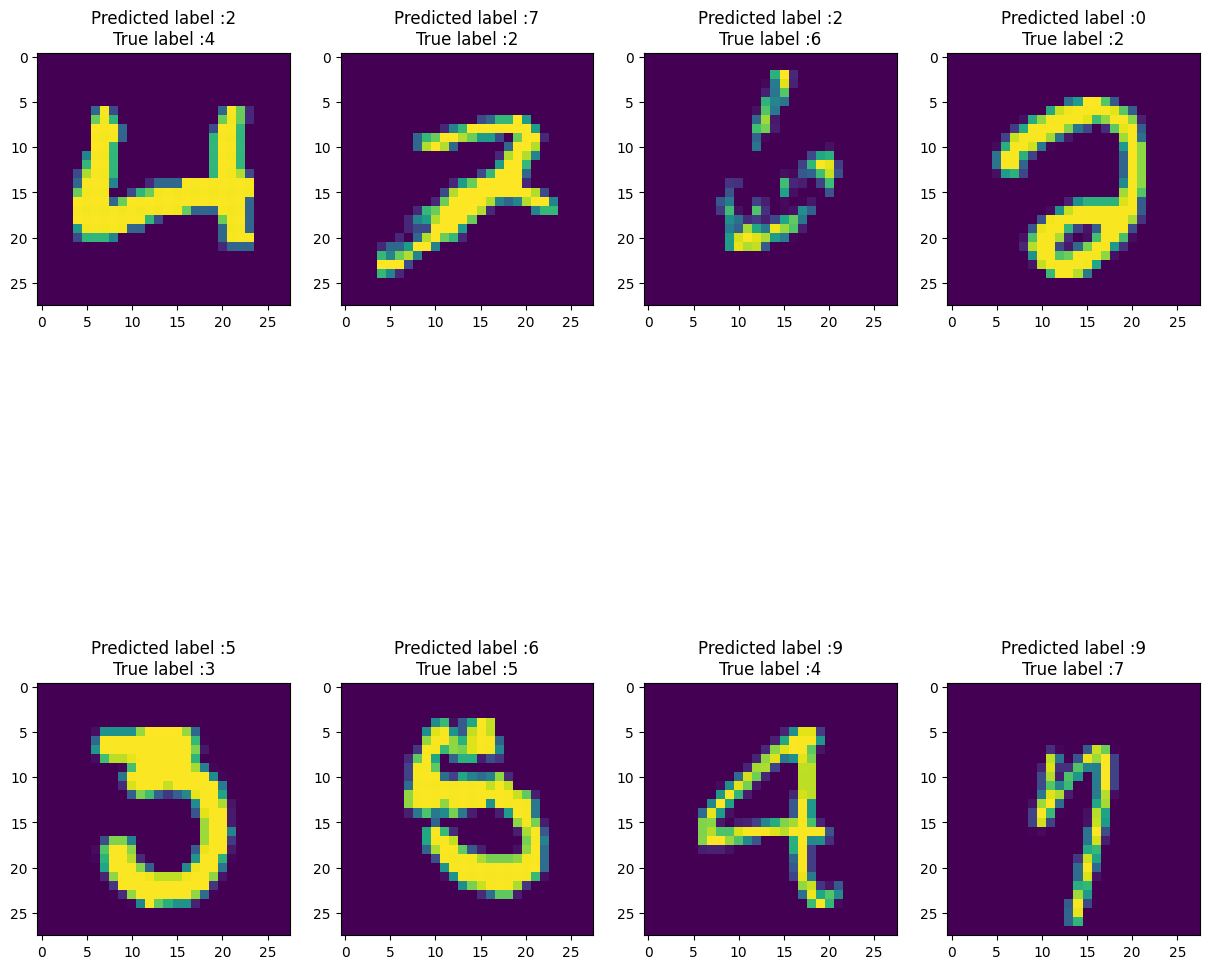

In [37]:
#ANN Training
(train_images, train_labels), (test_images, test_labels) = load_and_preprocess_data()

modelANN = build_modelANN()
train_model(modelANN, train_images, train_labels)
evaluate_model(modelANN, test_images, test_labels)


#Confusion Matrix
#make predictions
predictions = modelANN.predict(test_images)
predicted_labels = predictions.argmax(axis=1)

#display confusion matrix on test/predicted labels
ConfusionMatrixDisplay.from_predictions(test_labels, predicted_labels)
plt.show()

#display errors
display_important_errors(predictions, predicted_labels, test_labels, test_images)

#model and layers summary
modelANN.summary()

As can be seen, the accuracy of this model is quite high, but for the purpose of this problem, fairly low. Ideally, you would probably want an accuracy above 99%.

## Simple CNN
This is the running module for the simple convolutional neural network

Training:
Epoch 1/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1630 - accuracy: 0.9519
Epoch 2/5
1875/1875 [==============================] - 37s 19ms/step - loss: 0.0588 - accuracy: 0.9821
Epoch 3/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0414 - accuracy: 0.9871
Epoch 4/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0307 - accuracy: 0.9901
Epoch 5/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0230 - accuracy: 0.9927


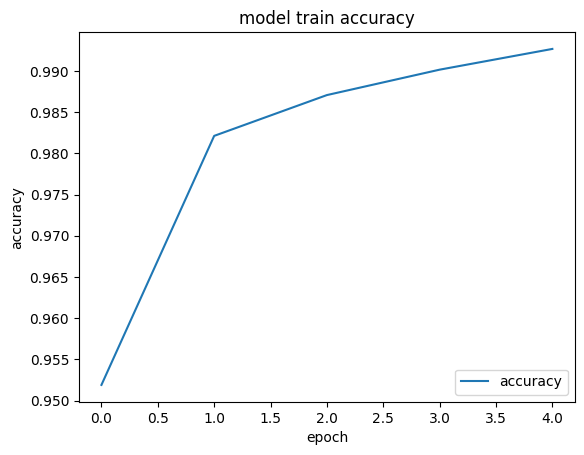

Evaluation:
313/313 [==============================] - 2s 6ms/step - loss: 0.0531 - accuracy: 0.9827
Test accuracy: 0.982699990272522
313/313 [==============================] - 2s 7ms/step


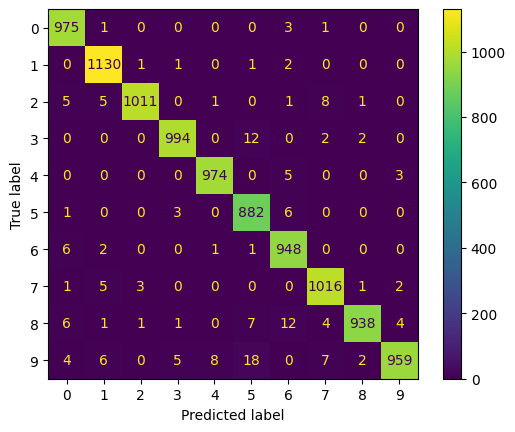

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 5408)              0         
                                                                 
 dense_24 (Dense)            (None, 128)               692352    
                                                                 
 dropout_17 (Dropout)        (None, 128)               0         
                                                                 
 dense_25 (Dense)            (None, 10)                1290      
                                                     

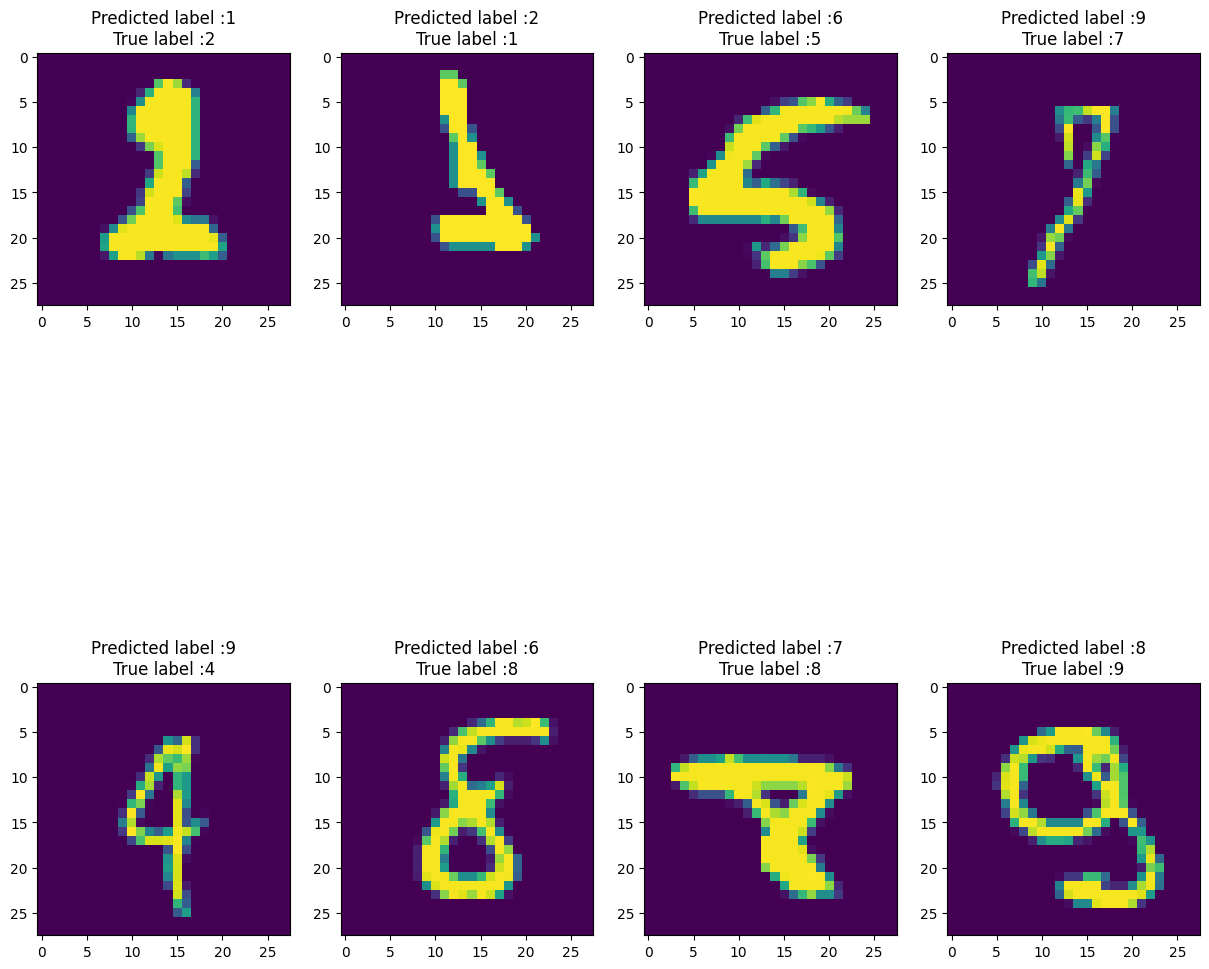

In [38]:
#CNN Simple Training
(train_images, train_labels), (test_images, test_labels) = load_and_preprocess_data()

train_images2 = np.expand_dims(train_images, axis=-1)
test_images2 = np.expand_dims(test_images, axis=-1)

modelCNNSimple = build_modelCNNSimple()
train_model(modelCNNSimple, train_images2, train_labels)
evaluate_model(modelCNNSimple, test_images2, test_labels)


#Confusion Matrix
#make predictions
predictions = modelCNNSimple.predict(test_images)
predicted_labels = predictions.argmax(axis=1)

#display confusion matrix on test/predicted labels
ConfusionMatrixDisplay.from_predictions(test_labels, predicted_labels)
plt.show()

#display errors
display_important_errors(predictions, predicted_labels, test_labels, test_images)

# summary of model and layers
modelCNNSimple.summary()

## Main CNN
This is the running module of the main convolutional neural network

Training:
Epoch 1/5
1875/1875 [==============================] - 93s 49ms/step - loss: 0.2380 - accuracy: 0.9224
Epoch 2/5
1875/1875 [==============================] - 96s 51ms/step - loss: 0.0813 - accuracy: 0.9754
Epoch 3/5
1875/1875 [==============================] - 97s 51ms/step - loss: 0.0629 - accuracy: 0.9816
Epoch 4/5
1875/1875 [==============================] - 91s 49ms/step - loss: 0.0553 - accuracy: 0.9837
Epoch 5/5
1875/1875 [==============================] - 91s 49ms/step - loss: 0.0487 - accuracy: 0.9854


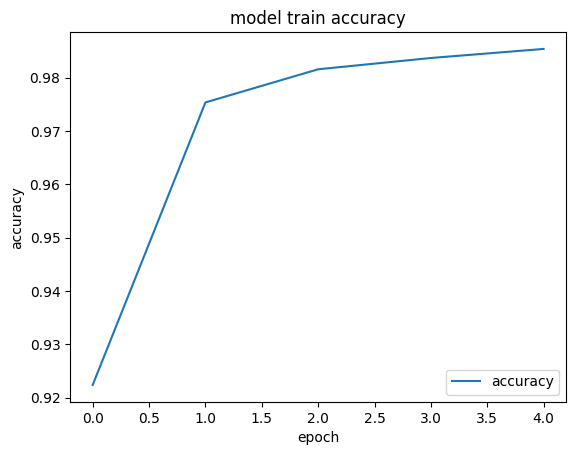

Evaluation:
313/313 [==============================] - 4s 13ms/step - loss: 0.0356 - accuracy: 0.9900
Test accuracy: 0.9900000095367432
313/313 [==============================] - 5s 17ms/step


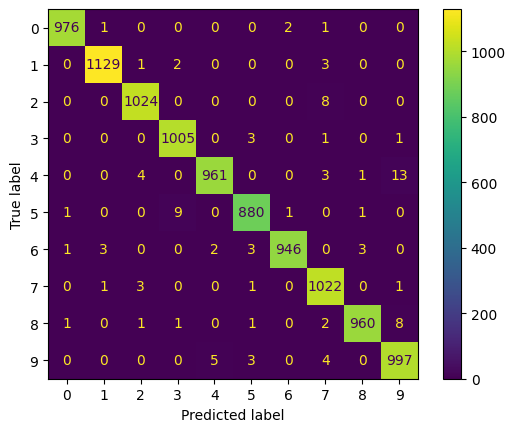

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_22 (Dropout)        (None, 14, 14, 32)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 14, 14, 32)        9248      
                                                                 
 conv2d_20 (Conv2D)          (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 7, 7, 32)          0         
 ng2D)                                               

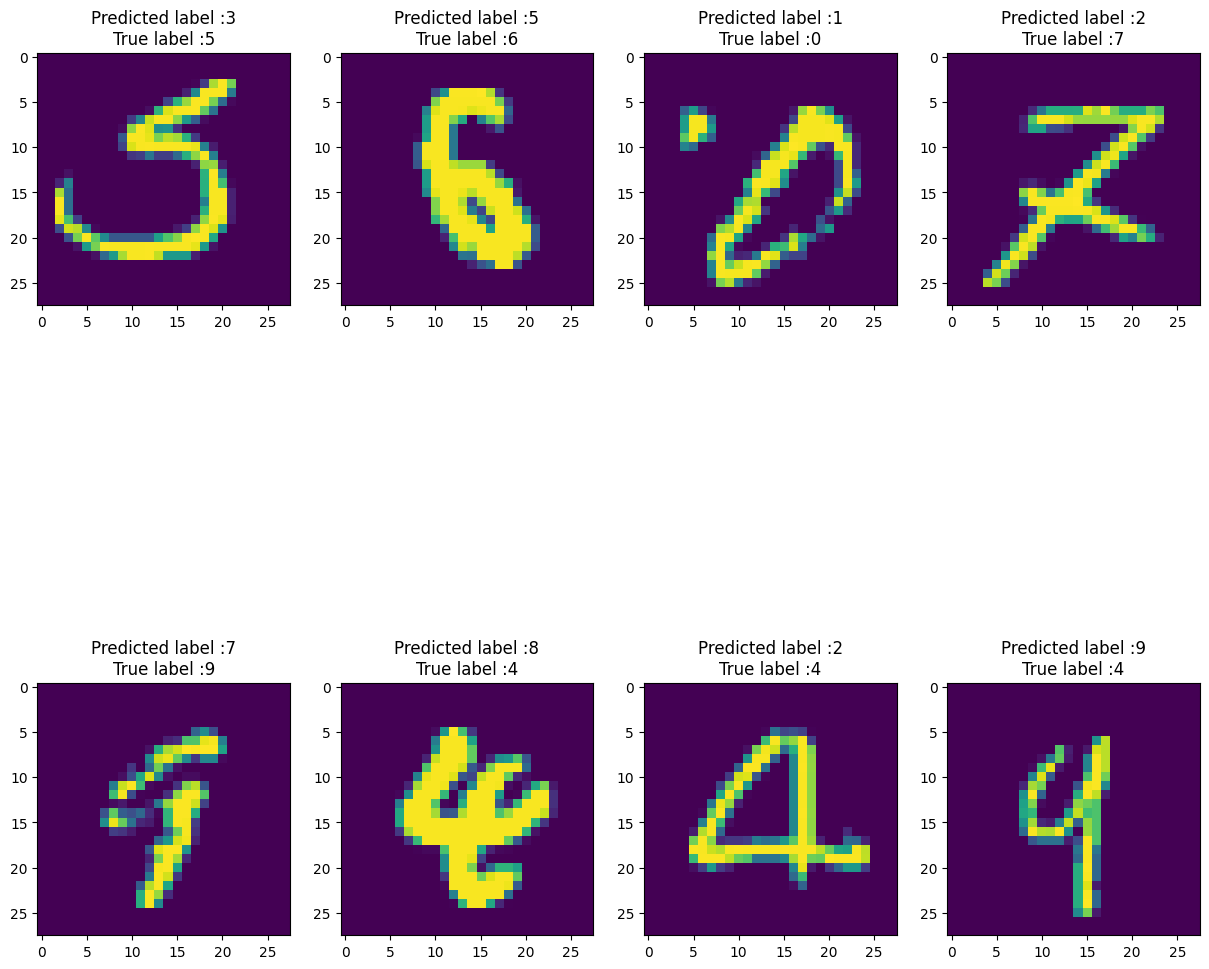

In [40]:
#Advanced CNN Training
(train_images, train_labels), (test_images, test_labels) = load_and_preprocess_data()

train_images2 = np.expand_dims(train_images, axis=-1)
test_images2 = np.expand_dims(test_images, axis=-1)

modelCNN = build_modelCNN()
train_model(modelCNN, train_images2, train_labels)
evaluate_model(modelCNN, test_images2, test_labels)


#Confusion Matrix
#make predictions
predictions = modelCNN.predict(test_images)
predicted_labels = predictions.argmax(axis=1)

#display confusion matrix on test/predicted labels
ConfusionMatrixDisplay.from_predictions(test_labels, predicted_labels)
plt.show()

#display errors
display_important_errors(predictions, predicted_labels, test_labels, test_images)

#model and layers summary
modelCNN.summary()